## Мария Такташева
# Задача 1
### 1.

Найдите эффективный диаметр этого графа.

In [1]:
import networkx as nx

G = nx.read_edgelist('graph1.txt')

In [2]:
from tqdm import tqdm

distance_matrix = dict()
for k, v in tqdm(nx.all_pairs_shortest_path_length(G)):
    distance_matrix[k] = v
    
node_pairs = G.number_of_nodes() ** 2

4039it [04:42, 14.32it/s]


In [3]:
def g(d):
    share = 0
    for v, neighbors in distance_matrix.items():
        for u, dist in neighbors.items():
            if dist <= d:
                  share += 1
    return share / node_pairs

In [4]:
g_list = []
for d in range(10):
    g_list.append(g(d))

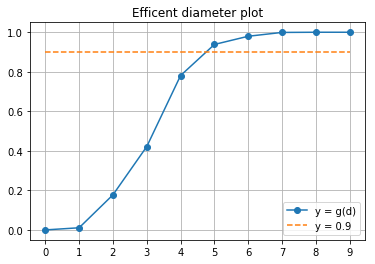

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Efficent diameter plot')
plt.plot(range(10), g_list, marker='o', label='y = g(d)')
plt.plot([0, 9], [0.9, 0.9], ls='--', label='y = 0.9')
plt.xticks(range(10))
plt.legend()
plt.grid()
plt.show()

Чтобы найти эффективный диаметр, подсчитаем в какой точке происходит пересечение линий

In [6]:
import numpy as np

a1, a0 = np.polyfit([4, 5], [g_list[4], g_list[5]], 1)
efficent_diameter = (0.9 - a0) / a1
efficent_diameter

4.757110016100299

### 2.

Найдите число вершин в самой большой компоненте связности и оцените средний локальный кластерный коэффициент.

In [67]:
G = nx.read_edgelist('graph2.txt')

Число вершин в самой большой компоненте связности

In [8]:
max_comp = max(nx.connected_component_subgraphs(G), key=len)
max_comp.number_of_nodes()

855802

Средний локальный кластерный коеффициент

In [9]:
nx.average_clustering(G)

0.5142961475354184

# Задача 2

Для графа из второго пункта задачи 1 с помощью функции curve_fit модуля scipy.optimize
аппроксимируйте «основную» часть графика распределения степеней вершин степенным законом
c. Постройте на одном графике в логарифмических координатах распределение степеней вершин dγ
и график полученной функции. Проделайте то же самое для кумулятивного распределения степеней вершин. Проинтерпретируйте результат и объясните разницу в графиках и в константах γ.

В случае кумулятивного распределения считается не число вершин заданной степени, а число вершин со степенью не меньше заданной.

Преобразуем функцию $ y = \dfrac{c}{d^{\gamma}} $ в линейную форму:
$ \ln y = \ln c - \gamma \ln d $ и аппроксимируем линейную функцию 

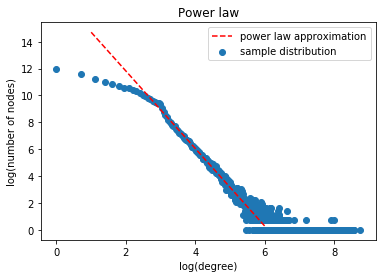

In [68]:
from collections import Counter

degrees_dict = dict(G.degree())
degrees_count = Counter(degrees_dict.values())
xdata, ydata = zip(*sorted(degrees_count.items()))
logxdata, logydata = np.log(xdata), np.log(ydata)

gamma, logc = np.polyfit(logxdata[40:200], logydata[40:200], 1) # выделим "основную" часть графика
xspace = np.linspace(1, 6)

plt.title('Power law')
plt.xlabel('log(degree)')
plt.ylabel('log(number of nodes)')
plt.scatter(logxdata, logydata, label='sample distribution')
plt.plot(xspace, gamma * xspace + logc, color='red', ls='--', label='power law approximation')
plt.legend()
plt.show()

In [69]:
gamma

-2.885335930924479

Кумулятивное распределение

In [73]:
degrees_list = np.array(list(degrees_dict.values()))
cum_degrees_count = dict()
for d in range(np.max(degrees_list)):
    cum_degrees_count[d] = degrees_list[degrees_list >= d].shape[0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


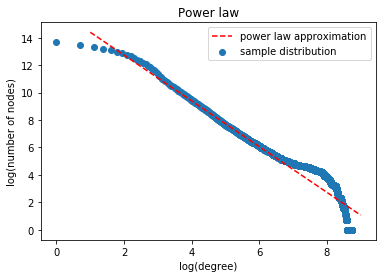

In [74]:
xdata, ydata = zip(*sorted(cum_degrees_count.items()))
logxdata, logydata = np.log(xdata), np.log(ydata)

gamma, logc = np.polyfit(logxdata[30:500], logydata[30:500], 1) # выделим "основную" часть графика
xspace = np.linspace(1, 9)

plt.title('Power law')
plt.xlabel('log(degree)')
plt.ylabel('log(number of nodes)')
plt.scatter(logxdata, logydata, label='sample distribution')
plt.plot(xspace, gamma * xspace + logc, color='red', ls='--', label='power law approximation')
plt.legend()
plt.show()

In [75]:
gamma

-1.6670451510468915

Кумулятивное распределение учитывает вершины степени выше данной — это делает график более плавно изменяющимся, гладким и дает меньший угол наклона (гамма меньше по модулю).

Также видно из графика не кумулятивного степенного закона, что вершин большой степени достаточно мало, поэтому график становится достаточно шумным в области высоких степеней. Эта проблема решается использованием кумулятивного распределения, однако "хвост" графика все равно выделяется из основного тренда — ведь остается мало вершин степени выше данной, и распределение становится похожим на не кумулятивное.

# Задача 3
### 1.
Сгенерируйте 10000 графов в модели Эрдёша–Реньи при n = 10, p = 0.2, и найдите, сколько из них являются деревьями. Сравните долю деревьев среди полученных графов с теоретическим значением вероятности того, что граф в такой модели является деревом.

In [87]:
num_trees = 0
for i in range(10000):
    G = nx.erdos_renyi_graph(10, 0.2)
    if nx.is_tree(G):
        num_trees += 1

num_trees / 10000

0.016

Tеоретическое количество деревьев: 

- на $ n $ вершинах можно построить $ n^{n-2} $ деревьев

- в дереве всего $ n-1 $ ребро

- значит количество деревьев — $ n^{n-2} p^{n-1} (1-p)^{n(n-1)/2 - n + 1} $

- при $ n = 10, p = 0.2 $ число деревьев равно $ 10^8 (0.2)^9 (0.8)^{36} = 0.0166 $

Вероятность совпадает с полученной в результате генерации

### 2.

Исследуйте при различных значениях n (например, от 10 до 5000, или, при возможности,
больше, с шагом 100), средний размер гигантской компоненты в графе Эрдёша–Реньи в случае «пороговой» для её возникновения вероятности p = 1 / n , проведя для каждого значения n
не менее 100 реализаций. Проверьте утверждение о том, что в случае пороговой вероятности наибольшая компонента имеет размер, пропорциональный n2/3, сравнив соответствующие величины на одном графике. 

In [17]:
mean_giant_component_size = dict()
for n in range(10, 5000, 100):
    giant_component_size = []
    for i in range(100):
        G = nx.erdos_renyi_graph(n, 1 / n)
        max_comp = max(nx.connected_component_subgraphs(G), key=len)
        giant_component_size.append(max_comp.number_of_nodes())
    mean_giant_component_size[n] = np.mean(giant_component_size)

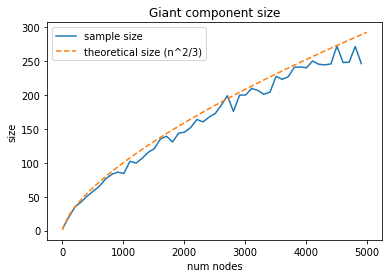

In [18]:
xspace = np.linspace(1, 5000)
plt.title('Giant component size')
plt.plot(*zip(*sorted(mean_giant_component_size.items())), label='sample size')
plt.plot(xspace, xspace ** (2 / 3), ls='--', label='theoretical size (n^2/3)')
plt.xlabel('num nodes')
plt.ylabel('size')
plt.legend()
plt.show()

Размер наибольшей компоненты пропорционален $ n^{2/3} $

### 3.

Сгенерируйте несколько графов в модели Эрдёша–Реньи при больших значениях n и при p  > ln n / 4n , и установите, в каких случаях граф не содержит пятивершинных древесных компонент связности (см. задачу 7 теоретического задания).

In [114]:
has_component = dict()
for p in [np.log(n) / (4 * n), np.log(n) / (3 * n), np.log(n) / (2 * n), np.log(n) / n]:
    G = nx.erdos_renyi_graph(n=10000, p=p)
    for subgraph in nx.connected_component_subgraphs(G):
        if subgraph.number_of_nodes() == 5:
            if subgraph.number_of_edges() == 4:
                has_component[p] = 1

In [115]:
has_component

{}

Заметим, что в задаче 7 из теоретического задания было доказано, что при $ p \ge \dfrac{\ln n}{4n} $ в графе а.п.н. нет компонент связности, которые были бы деревьями на 5 вершинах. При $ p \ge \dfrac{\ln n}{n} $ граф а.п.н связный, поэтому не беру такие вероятности.

### 4.

При n = 300 сгенерируйте при разных значениях p ∈ {0,0.05,0.1,0.15,...,1.0} граф G(n,p) в модели Эрдёша–Реньи и постройте график J(G(n,p)) в зависимости от p. Найдите теоретическую оценку для среднего значения этой величины и постройте её на том же графике.

In [21]:
def jacquard(edge):
    u = edge[0]
    v = edge[1]
    Nu = set(G.neighbors(u))
    Nv = set(G.neighbors(v))
    return len(Nu.intersection(Nv)) / len(Nu.union(Nv))

def mean_jacquard(graph):
    coefs = []
    for edge in graph.edges():
        coefs.append(jacquard(edge))
    return np.mean(coefs)

In [129]:
graph_jacquard = dict()
theoretical_jacquard = dict()
p = 0.05
while p <= 1:
    G = nx.erdos_renyi_graph(n=300, p=p)
    graph_jacquard[p] = mean_jacquard(G)
    theoretical_jacquard[p] = p / (2 - p) # https://arxiv.org/pdf/1710.01724v1.pdf
    p += 0.05

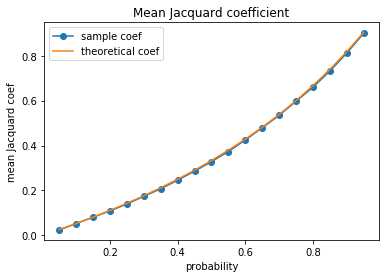

In [132]:
plt.title('Mean Jacquard coefficient')
plt.plot(*zip(*sorted(graph_jacquard.items())), label='sample coef', marker='o')
plt.plot(*zip(*sorted(theoretical_jacquard.items())), label='theoretical coef')
plt.xlabel('probability')
plt.ylabel('mean Jacquard coef')
plt.legend()
plt.show()

Все идеально совпадает

### 5.
Пусть n = 2000 и p = c/n при c = 0.8. Реализуйте случайный граф G(n,p) и найдите, сколько среди его компонент связности деревьев и унициклических графов. Смоделируйте тот случай, когда унициклические графы есть и визуализируйте их в том же коде.

Number of trees: 1226
Number of unicyclic graphs: 2


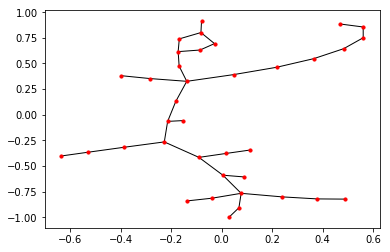

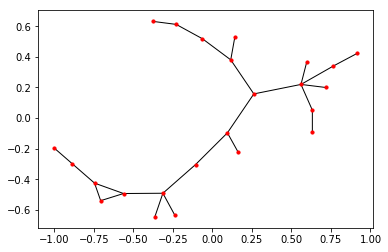

In [32]:
G = nx.erdos_renyi_graph(n=2000, p=0.8/2000, seed=9)

trees_G = 0
unicycles_G = 0
for subgraph in nx.connected_component_subgraphs(G):
    if nx.is_tree(subgraph):
        trees_G += 1
    elif subgraph.number_of_edges() == subgraph.number_of_nodes():
        unicycles_G += 1
        plt.figure()
        nx.draw_networkx(subgraph, node_size=10, with_labels=False)
        
print('Number of trees:', trees_G)
print('Number of unicyclic graphs:', unicycles_G)

### 6.

Реализуйте функцию нахождения всех изоморфных копий графа H в заданном графе. Сгенерируйте графы G(1000, p) при различных p и изучите, сколько в них копий этого графа. Сравните с числом треугольников, визуализировав на графике поведение среднего значения этих величин (при генерации несколько раз) в зависимости от p, p = 0, 0.005, 0.01, . . . , 0.05

In [96]:
def find_H_copies(G):
    H_copies = []
    for a in G.nodes():
        for b in G.neighbors(a):
            for c in G.neighbors(a):
                if b == c:
                    continue
                elif G.has_edge(b, c):
                    for d in G.neighbors(b):
                        for e in G.neighbors(b):
                            if (d == e) or (d == a) or (e == a):
                                continue
                            elif G.has_edge(d, c) and G.has_edge(e, c):
                                H_copy = sorted((a, b, c, d, e))
                                if not H_copy in H_copies:
                                    H_copies.append(H_copy)
    return H_copies

In [100]:
H_copies_dict = dict()
triangles_dict = dict()

p = 0.005
while p <= 0.05:
    mean_copies = []
    mean_triangles = []
    for i in range(5):
        G = nx.erdos_renyi_graph(n=1000, p=p)
        mean_copies.append(len(find_H_copies(G)))
        mean_triangles.append(sum(nx.triangles(G).values()))
    H_copies_dict[p] = np.mean(mean_copies)
    triangles_dict[p] = np.mean(mean_triangles)
    p += 0.005 

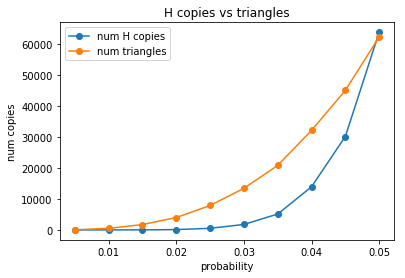

In [147]:
plt.title('H copies vs triangles')
plt.plot(*zip(*sorted(H_copies_dict.items())), label='num H copies', marker='o')
plt.plot(*zip(*sorted(triangles_dict.items())), label='num triangles', marker='o')
plt.xlabel('probability')
plt.ylabel('num copies')
plt.legend()
plt.show()

При маленьких вероятностях треугольников больше, но потом граф становится плотным и связным, и число H графов и треугольников сходится

# Задача 4
Обхватом графа называется длина самого короткого (простого) цикла в нём. Реализуйте функцию, считающую обхват заданного графа. 

In [54]:
from networkx import NetworkXNoPath

def girth(G):
    shortest_cycle = float('inf')
    edges = list(G.edges())
    for edge in edges:
        G.remove_edge(edge[0], edge[1])    
        try:
            cycle = 1 + nx.shortest_path_length(G, edge[0], edge[1])  
        except NetworkXNoPath:              # новый граф может быть не связным
            continue
        G.add_edge(edge[0], edge[1])
        if cycle < shortest_cycle:          
            shortest_cycle = cycle
        elif shortest_cycle == 3:          # простых циклов длины меньше 3 не бывает
            return 3
    return shortest_cycle

In [55]:
G = nx.erdos_renyi_graph(n=1000, p=1/100)
girth(G)

3

In [56]:
G = nx.erdos_renyi_graph(n=1000, p=1/1000)
girth(G)

8

Рассмотрим следующий индуктивный процесс построения графа Gn. Граф G1 - это две вершины, соединенные ребром. Пусть построен граф Gt на p вершинах. Тогда граф Gt+1 получается из графа Gt добавлением для каждой вершины v графа Gt новой вершины v′, соединенной с соседями v в Gt. Кроме этого, в граф Gt+1 добавляется еще одна вершина w, соединенная ребрами со всеми p новыми вершинами.
Реализуйте указанный процесс, сгенерируйте граф G10 и с помощью функции подсчета обхвата графа покажите, что в нем нет треугольников.

In [136]:
def step(G):
    new_G = G.copy()
    new_nodes = []
    i = G.number_of_nodes()
    for v in G.nodes():
        for neighbor_v in G.neighbors(v):
            new_G.add_edge(i, neighbor_v)
            new_nodes.append(i)
        i += 1
    for u in new_nodes:
        new_G.add_edge(i, u)
    return new_G

In [158]:
G = nx.Graph()
G.add_edge(0, 1)
for t in range(9):
    G = step(G)

In [138]:
girth(G)

4

Обхват графа равен 4 — треугольников нет